In [2]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv(r'E:\backup2\Data science\projects_data_science\boston\boston.csv', sep = '\t')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.dtypes
data['medv'] = data['medv'].astype(int)

In [5]:
set(data['chas'])

{0, 1}

In [6]:
data.describe()
data.shape

(506, 14)

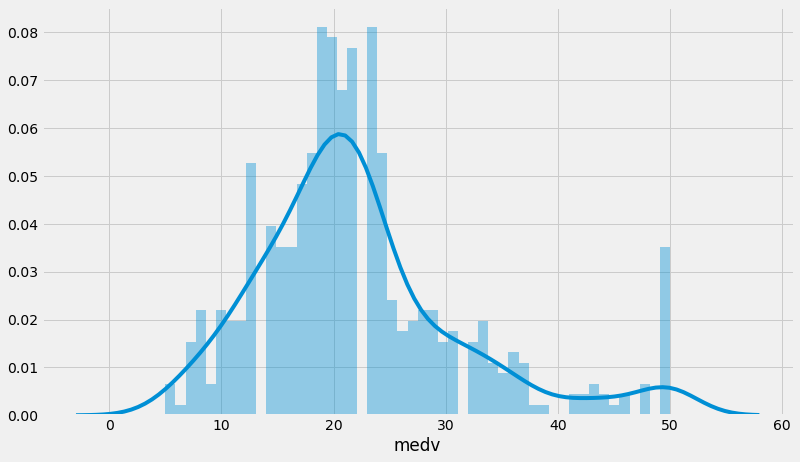

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(data.medv, bins = 50)

In [8]:
print('skew is ', data.medv.skew())

skew is  1.1272827240425665


In [9]:
numeric_features = data.select_dtypes(include = [np.number])
numeric_features.dtypes
corr = numeric_features.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.386118
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.359312
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.480468
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.177141
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.426740
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.694664
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.375523
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.248138
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.380649
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.467058


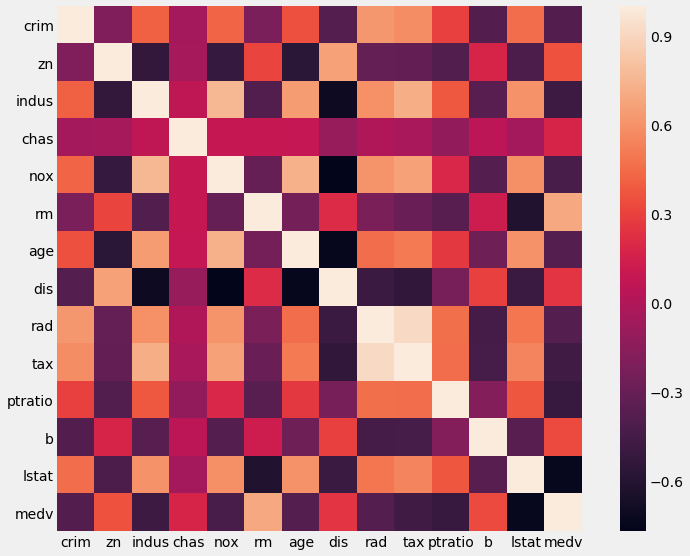

In [10]:
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, vmax = 1, square = True)

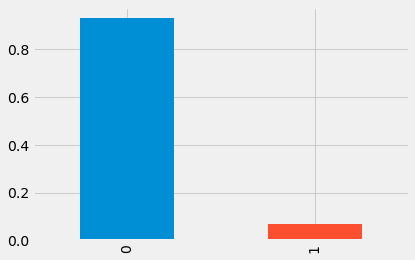

In [11]:
data['chas'].value_counts(normalize=True).plot(kind='bar')

In [12]:
unique = len(set(data['age']))
total = len(data['age'])

repeated = total - unique
print(unique)
print(repeated)

356
150


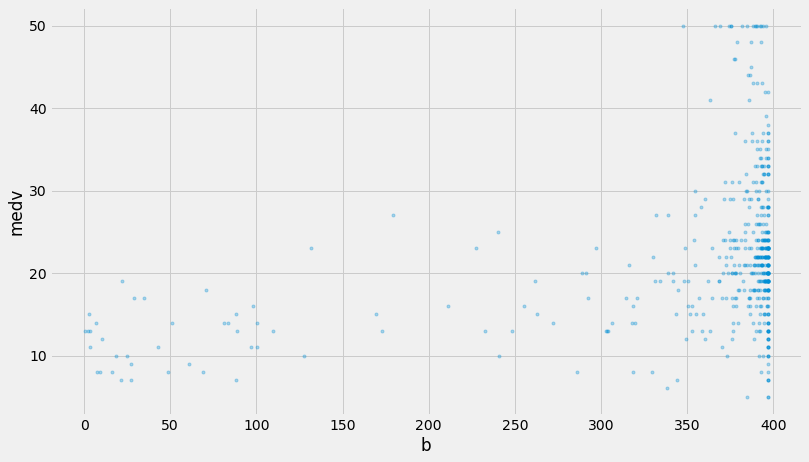

In [13]:
plt.figure(figsize = (12,7))
plt.xlabel('b')
plt.ylabel('medv')
plt.plot(data.b, data['medv'], '.', alpha = 0.3)


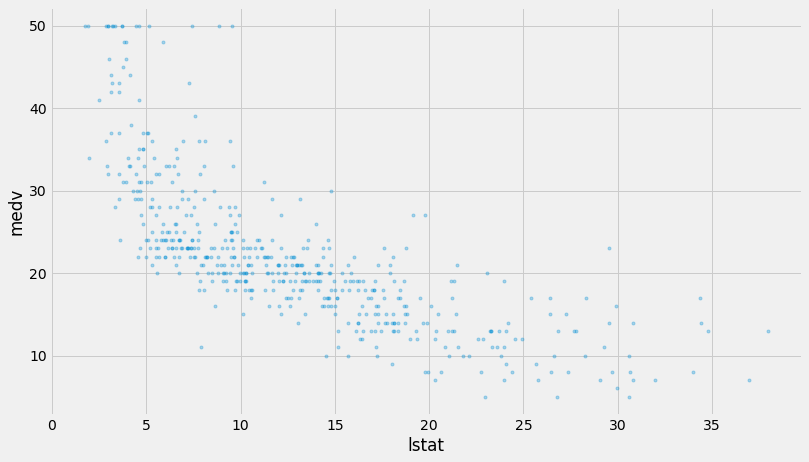

In [14]:
plt.figure(figsize = (12,7))
plt.xlabel('lstat')
plt.ylabel('medv')
plt.plot(data.lstat, data['medv'], '.', alpha = 0.3)

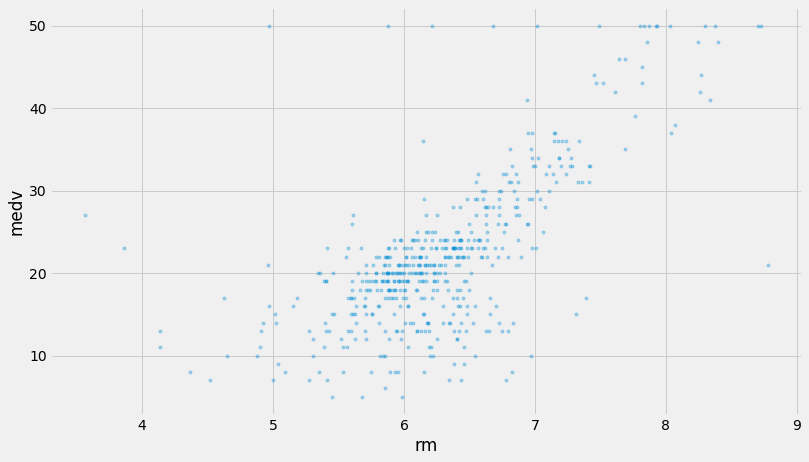

In [15]:
plt.figure(figsize = (12,7))
plt.xlabel('rm')
plt.ylabel('medv')
plt.plot(data.rm, data['medv'], '.', alpha = 0.3)

In [16]:
# rm_pivot = \
# data.pivot_table(index = 'rm', values = 'medv', aggfunc = np.median)

# rm_pivot.plot(kind= 'bar', color= 'blue', figsize = (12,7))
# plt.xticks(rotation = 90)
# plt.show()

In [17]:
data['medv'].isna().sum()

0

In [18]:
# sns.pairplot(data, size=2.5)
# plt.tight_layout()

In [19]:
from sklearn.metrics import r2_score
def perf_checker(y_true, y_predict):
    r_score = r2_score(y_true, y_predict)
data.shape

(506, 14)

In [20]:
prices = data['medv']
features = data[['zn', 'b', 'rm', 'dis']]

X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 5)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

# fruit_prediction = knn.predict([[20, 4.3, 5.5]])

0.06299212598425197

([<matplotlib.axis.XTick at 0x21d98cea4a8>,
 <a list of 5 Text xticklabel objects>)

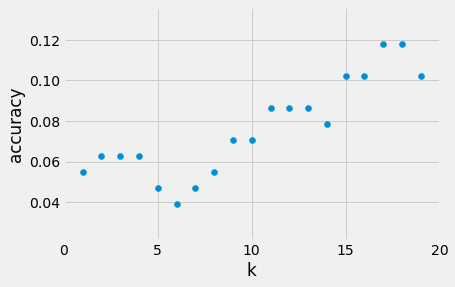

In [22]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [23]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))




Accuracy of Logistic regression classifier on training set: 0.13
Accuracy of Logistic regression classifier on test set: 0.10


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.16


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.18
Accuracy of LDA classifier on test set: 0.09


In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.17
Accuracy of GNB classifier on test set: 0.06


In [27]:
from sklearn.svm import LinearSVC

    
svm = LinearSVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))




Accuracy of SVM classifier on training set: 0.08
Accuracy of SVM classifier on test set: 0.03


In [28]:
# from sklearn.preprocessing import StandardScaler
# print(X_train.shape)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
print(X_test.shape)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))

(127, 4)
0.5603484208759021


In [29]:
X_train.shape

(379, 4)

In [30]:
from sklearn.decomposition import PCA
target = data['medv']
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [31]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.39197163e-01 6.04906596e-02 2.61537684e-04 5.06393854e-05]


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# print(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[19 22 19 13 22 14 21 19 19 19 19 19 19 22 22 19 14 19 19 13 20 19 19 19
 22 14 19 19 19 20 19 19 21 19 20 21 19 14 20 22 21 13 19 14 22 22 14 19
 19 19 19 19 19 14 14 22 19 14 19 22 21 19 19 19 19 11 19 19 19 19 19 19
 19 14 19 22 14 19 22 20 19 19 19 14 22 14 19 11 19 22 19 19 19 19 19 22
 14 22 19 14 19 20 19 22 14 21 19 19 22 19 22 19 19 20 19 14 19 22 19 20
 19 22 19 22 22 19 19]


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.06299212598425197
